In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import json

In [2]:
df = pd.read_csv("./evaluations/finetuning_overview_doubling_max_lane_1.csv")

In [3]:
hd_columns = [column for column in df.columns if column.startswith("avg_hd")]
reward_columns = [column for column in df.columns if column.startswith("avg_reward")]
config_keys = list( json.loads(df.config.to_list()[0]).keys())

df["total_avg_reward"] = df[reward_columns].mean(axis=1)
df["total_avg_hd_distance"] = df[hd_columns].mean(axis=1)

for key in config_keys:
    df[key] = df["config"].apply(lambda x: json.loads(x)[key])

In [21]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_hd_distance", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
7,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-2927.147250,0.743110
2,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",-2722.213125,0.657371
6,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-2115.919250,0.621501
0,"{""delay"": 0, ""waiting_time"": 0, ""light_switche...",-2311.022250,0.599274
19,"{""delay"": 1, ""waiting_time"": 0, ""light_switche...",-822.087250,0.535303
8,"{""delay"": 0, ""waiting_time"": 2, ""light_switche...",-2121.491375,0.520721
16,"{""delay"": 1, ""waiting_time"": 0, ""light_switche...",-862.595500,0.504433
4,"{""delay"": 0, ""waiting_time"": 1, ""light_switche...",-1729.067875,0.497896
26,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",-608.174750,0.487530
55,"{""delay"": 1, ""waiting_time"": 2, ""light_switche...",-608.174750,0.487530


In [26]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
91,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-345.651250,0.407224
48,"{""delay"": 3, ""waiting_time"": 0, ""light_switche...",-371.558375,0.313561
77,"{""delay"": 3, ""waiting_time"": 0, ""light_switche...",-371.558375,0.313561
65,"{""delay"": 2, ""waiting_time"": 1, ""light_switche...",-372.248125,0.409735
36,"{""delay"": 2, ""waiting_time"": 1, ""light_switche...",-372.248125,0.409735
85,"{""delay"": 3, ""waiting_time"": 2, ""light_switche...",-374.125625,0.390360
45,"{""delay"": 2, ""waiting_time"": 3, ""light_switche...",-392.295750,0.333865
74,"{""delay"": 2, ""waiting_time"": 3, ""light_switche...",-392.295750,0.333865
39,"{""delay"": 2, ""waiting_time"": 1, ""light_switche...",-405.843750,0.444567
68,"{""delay"": 2, ""waiting_time"": 1, ""light_switche...",-405.843750,0.444567


In [33]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).config.to_list()[:20]

['{"delay": 3, "waiting_time": 3, "light_switches": 2}',
 '{"delay": 3, "waiting_time": 0, "light_switches": 0}',
 '{"delay": 3, "waiting_time": 0, "light_switches": 0}',
 '{"delay": 2, "waiting_time": 1, "light_switches": 0}',
 '{"delay": 2, "waiting_time": 1, "light_switches": 0}',
 '{"delay": 3, "waiting_time": 2, "light_switches": 0}',
 '{"delay": 2, "waiting_time": 3, "light_switches": 1}',
 '{"delay": 2, "waiting_time": 3, "light_switches": 1}',
 '{"delay": 2, "waiting_time": 1, "light_switches": 3}',
 '{"delay": 2, "waiting_time": 1, "light_switches": 3}',
 '{"delay": 2, "waiting_time": 3, "light_switches": 2}',
 '{"delay": 2, "waiting_time": 3, "light_switches": 2}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 1}',
 '{"delay": 3, "waiting_time": 0, "light_switches": 2}',
 '{"delay": 3, "waiting_time": 0, "light_switches": 2}',
 '{"delay": 2, "waiting_time": 0, "light_switches": 1}',
 '{"delay": 2, "waiting_time": 0, "light_switches": 1}',
 '{"delay": 2, "waiting_time": 

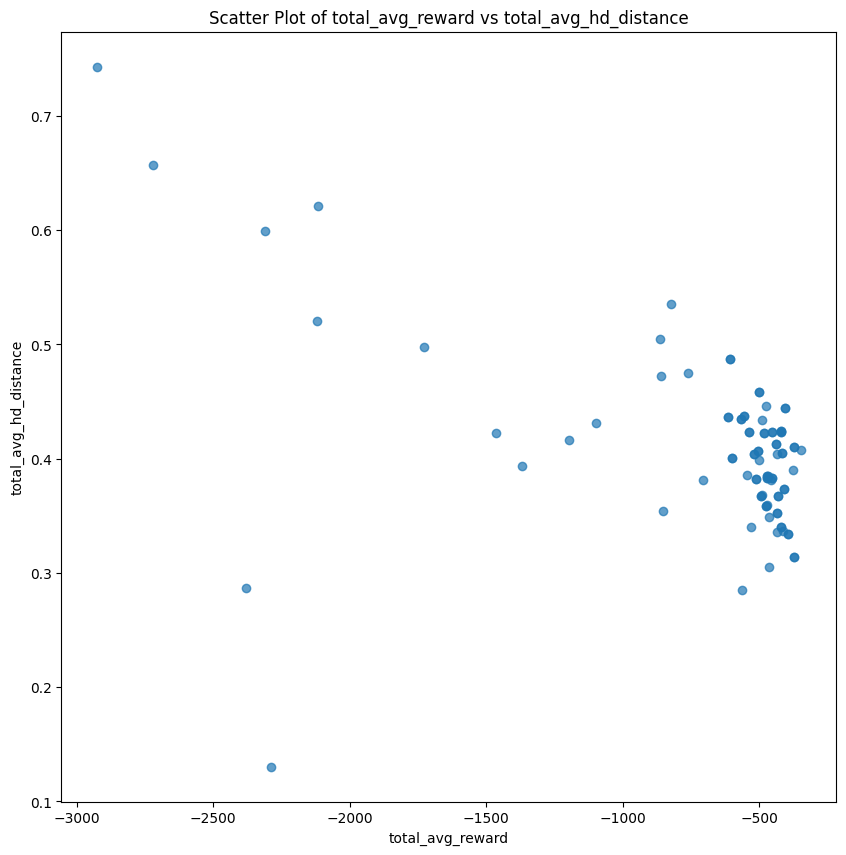

In [24]:
col1 = "total_avg_reward"
col2 = "total_avg_hd_distance"
plt.figure(figsize=(10, 10))
plt.scatter(df[col1], df[col2], alpha=0.7)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.show()

In [4]:
print(f"Correlation total_avg_hd_distance and total_avg_reward", df["total_avg_hd_distance"].corr(df['total_avg_reward']))

Correlation total_avg_hd_distance and total_avg_reward -0.4717016193757511


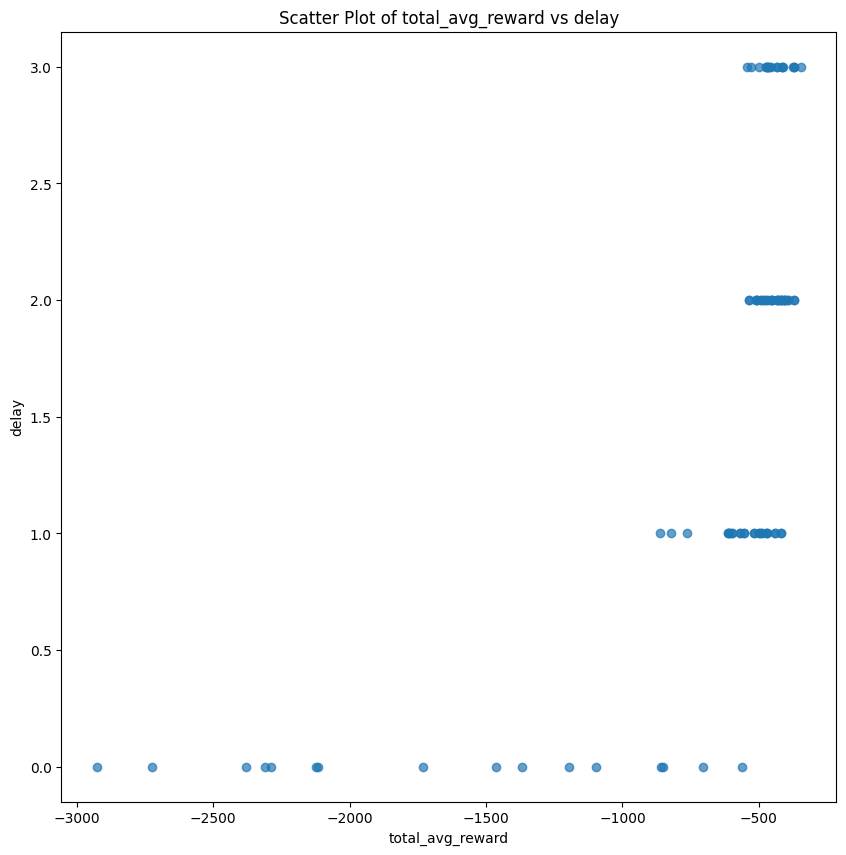

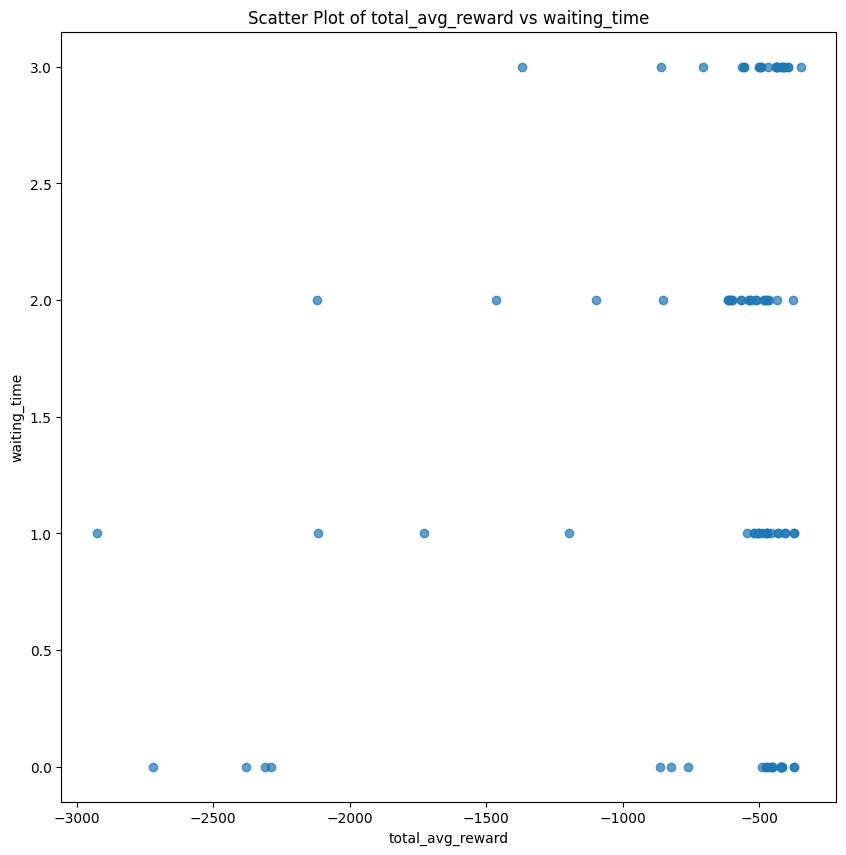

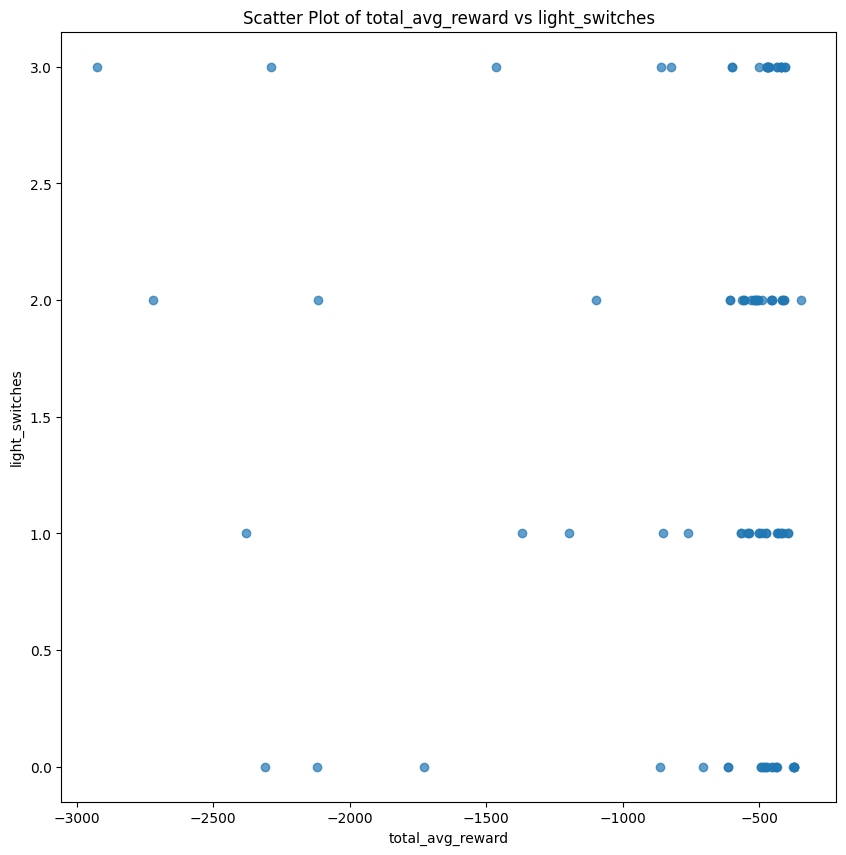

In [56]:
for col in config_keys:
    col1 = "total_avg_reward"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [64]:
for key in config_keys:
    print(df.groupby(key)['total_avg_reward'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and total_avg_reward", df[key].corr(df['total_avg_reward']))

   delay         mean         std
0      0 -1668.625219  755.777797
1      1  -557.332976  114.126376
2      2  -448.929930   46.248132
3      3  -443.243559   54.239079
Correlation delay and total_avg_reward 0.6429693491233823
   waiting_time        mean         std
0             0 -830.947957  763.506249
1             1 -741.547477  664.765754
2             2 -671.558469  386.807626
3             3 -518.033146  211.713295
Correlation waiting_time and total_avg_reward 0.20734590882385967
   light_switches        mean         std
0               0 -692.669353  558.621567
1               1 -655.486837  451.479356
2               2 -677.831917  561.249834
3               3 -726.108168  645.072996
Correlation light_switches and total_avg_reward -0.024827654089154102


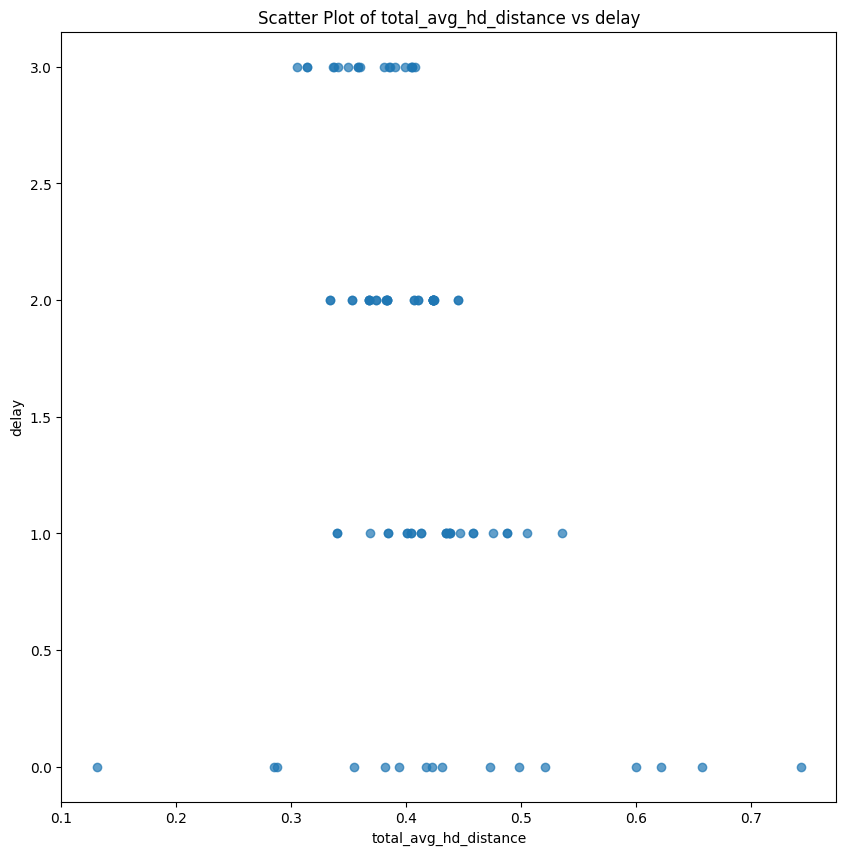

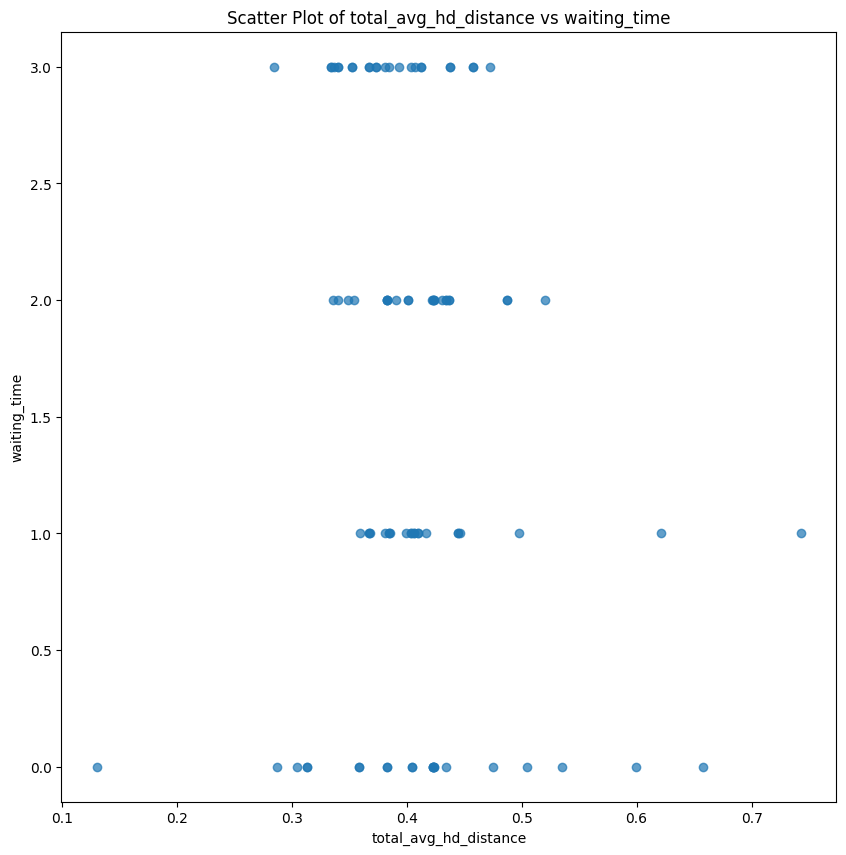

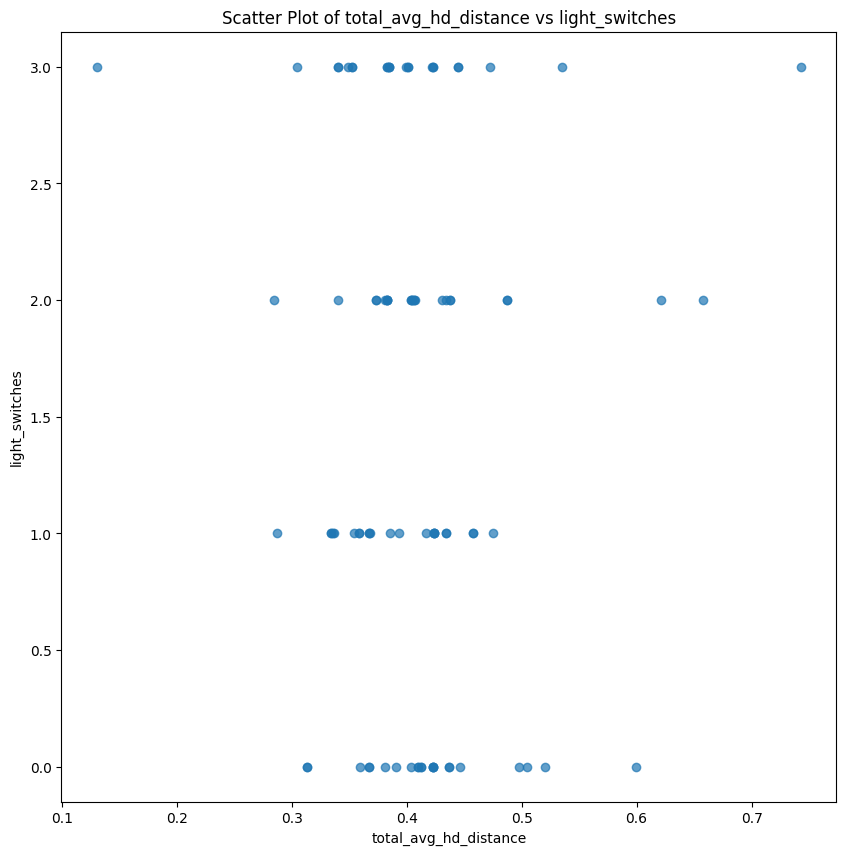

In [57]:
for col in config_keys:
    col1 = "total_avg_hd_distance"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [62]:
for key in config_keys:
    print(df.groupby(key)['total_avg_hd_distance'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and hd_distance", df[key].corr(df['total_avg_hd_distance']))

   delay      mean       std
0      0  0.450783  0.155726
1      1  0.429063  0.046995
2      2  0.395032  0.030854
3      3  0.364789  0.034071
Correlation delay and hd_distance -0.3833791845192211
   waiting_time      mean       std
0             0  0.408145  0.108156
1             1  0.429637  0.089852
2             2  0.411931  0.046066
3             3  0.383936  0.046992
Correlation waiting_time and hd_distance -0.13216084746443316
   light_switches      mean       std
0               0  0.420620  0.064521
1               1  0.389228  0.049191
2               2  0.421468  0.079261
3               3  0.399932  0.105340
Correlation light_switches and hd_distance -0.04218783362873122


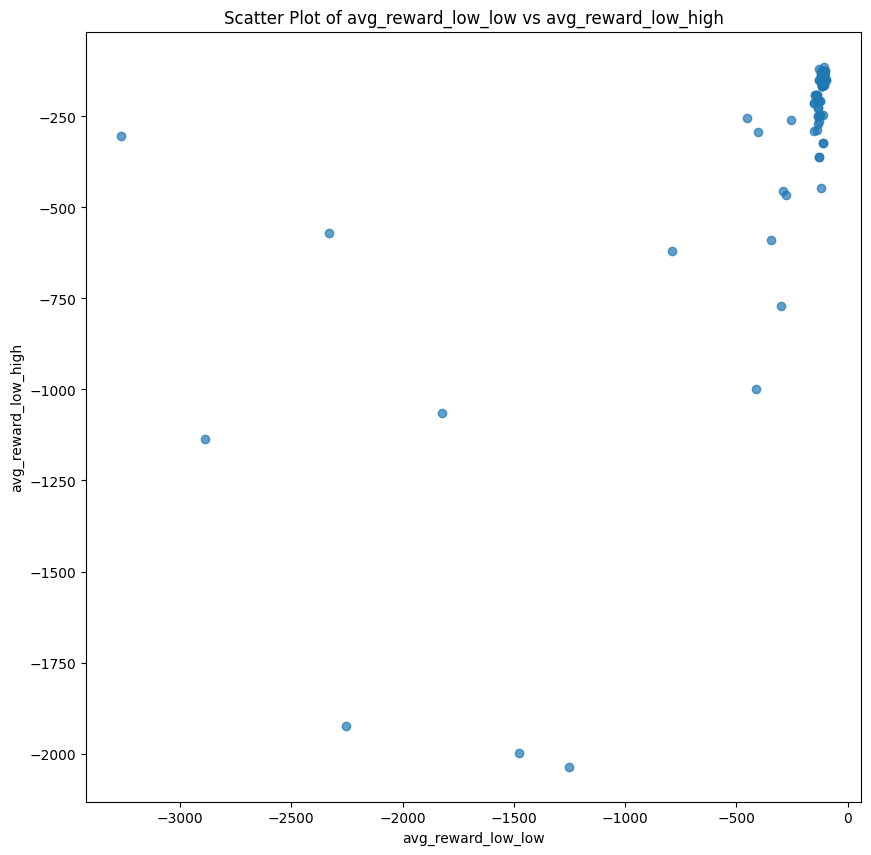

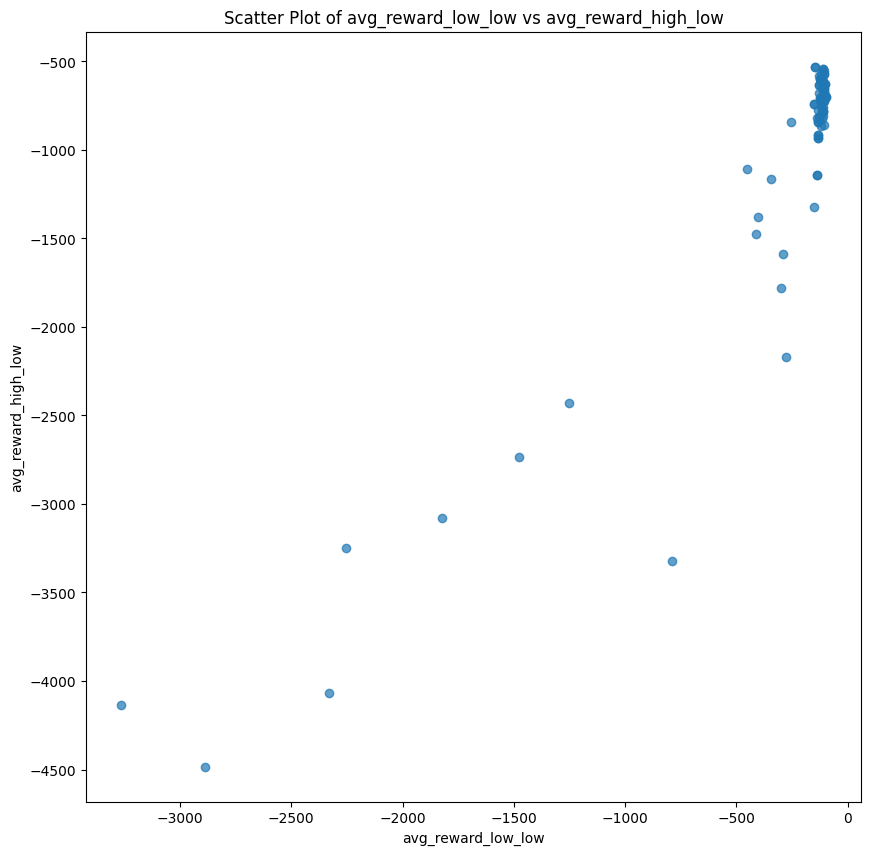

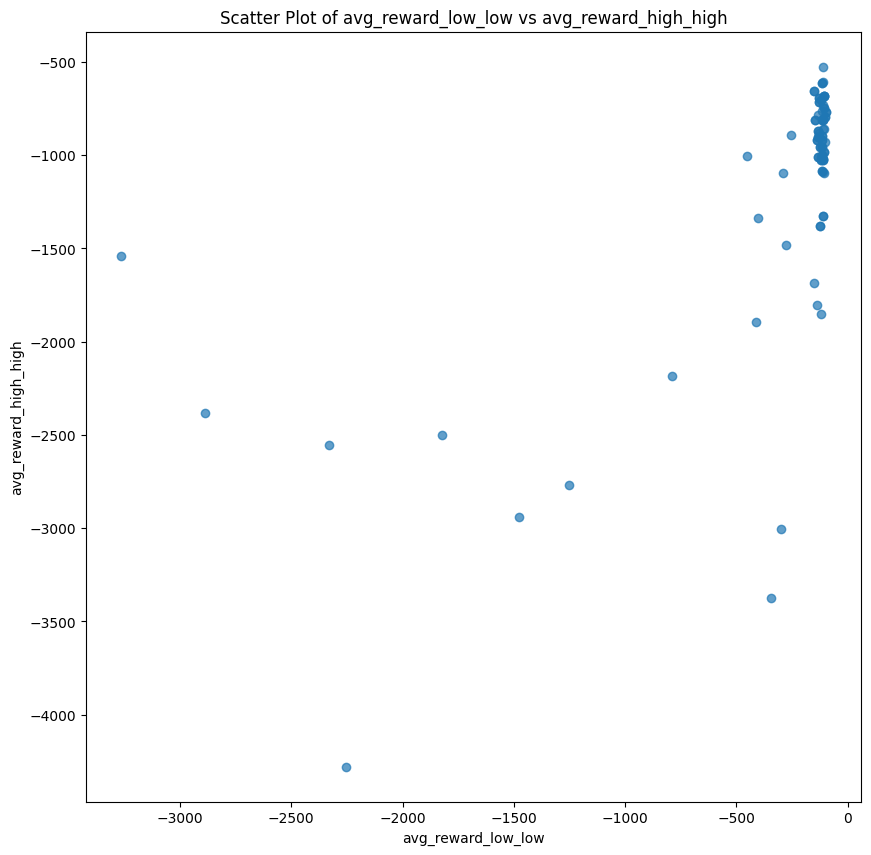

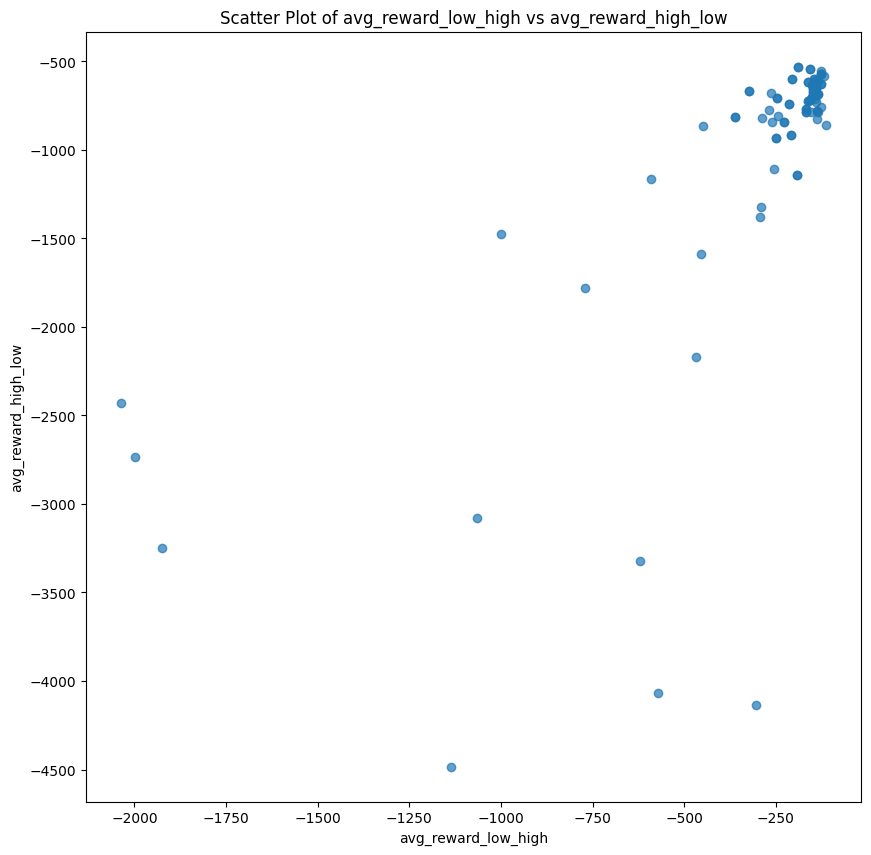

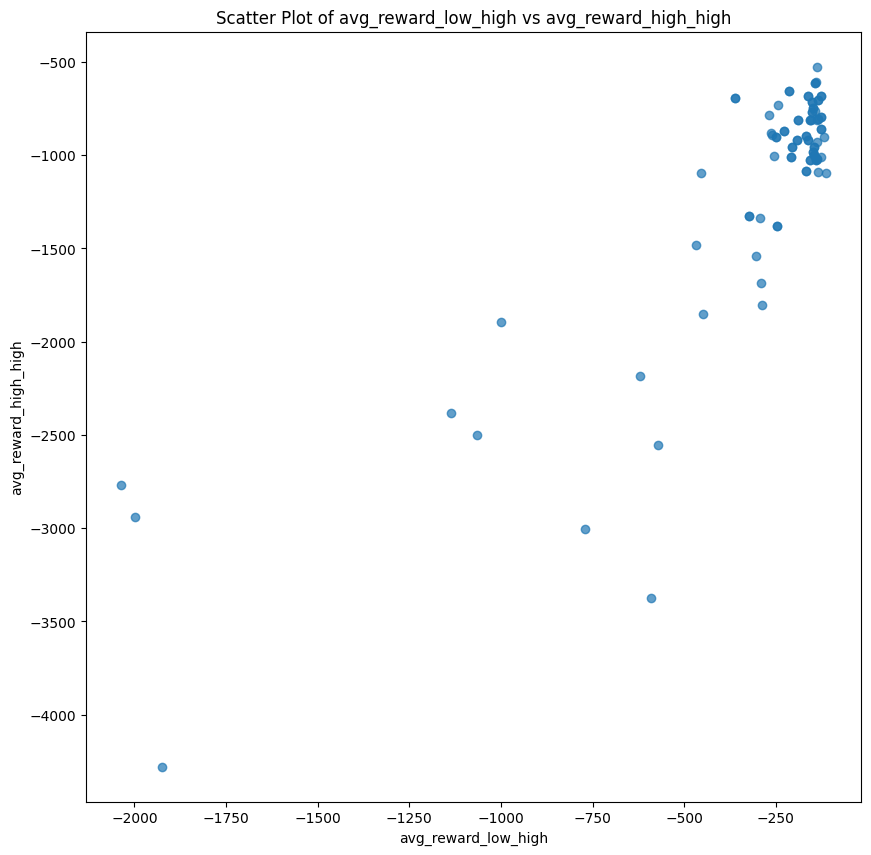

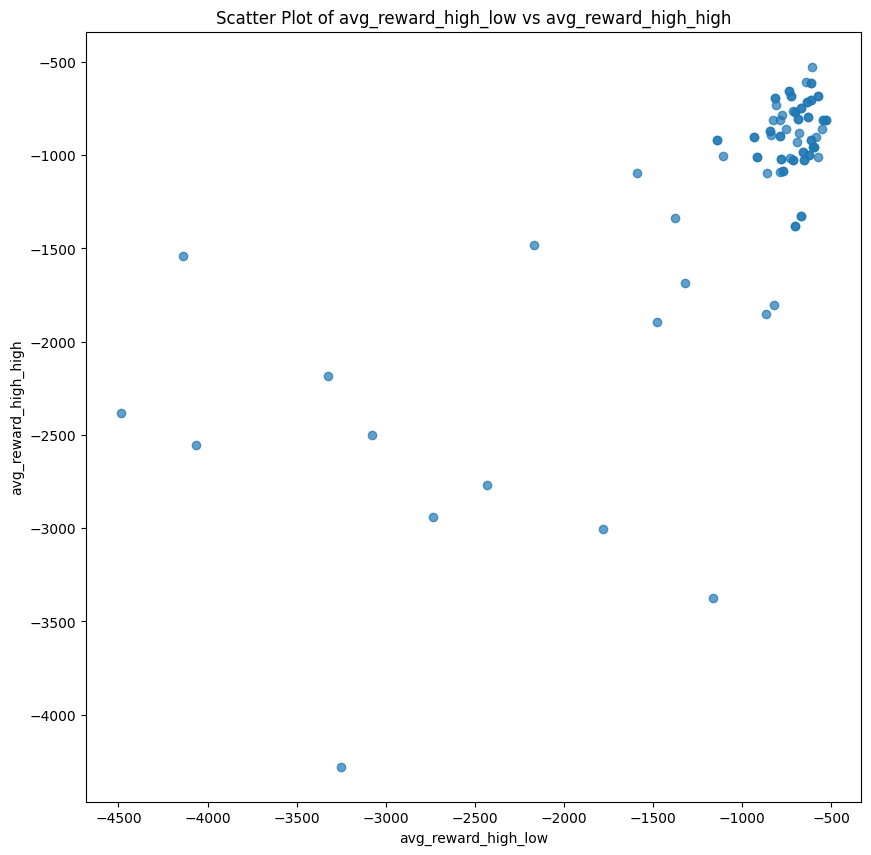

In [67]:


column_pairs = list(itertools.combinations(df.columns, 2))

# Create scatter plots
# naming convention: {metric}_{traffic}_{agent}
for col1, col2 in column_pairs:
    if col1.startswith("avg_hd_distance") and col2.startswith("avg_hd_distance"):
        pass
    elif col1.startswith("avg_reward") and col2.startswith("avg_reward"):
        pass
    else:
        continue
    
    if col1 == "config" or col2 == "config":
        continue
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()